In [1]:
from IPython.core.display import display, HTML
display(HTML\
        ("<style>.container { \
        width:100% !important; \
        }</style>"))
display(HTML\
        ("<style>.input_prompt{ \
        min-width: 1ex; \
        }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
##Mediciones de las bateras, enfocar a Uso [kW]
data_egauge = pd.read_csv('Data_eGauge_promedio_10min.csv', delimiter=',')#, skiprows=170)
data_egauge.describe()

,Uso [kW],Generación [kW],P Bat Out [A],P Bat IN [A],Potencia AC (Consumo)+ [kW],Potencia AC (Consumo)* [kVA],Tensión AC (Inversor) [V],Tensión DC (Banco de baterías) [V],Corriente consumo [A],Corriente PV [A],Corriente Bat OUT [A],Corriente Bat IN [A],Corriente T1 [A],Potencia Bat OUT+ [kW],Potencia Bat OUT- [kW],Potencia Bat IN+ [kW],Potencia Bat IN- [kW],Corriente disipación T1 [A]
count,20007.000000,20007.0,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000,20007.000000
mean,1.081991,0.0,21.768561,22.834638,1.081991,1.245085,177.735278,50.897476,5.423133,22.600336,21.768561,22.834638,22.471370,1.191057,0.078454,1.209930,0.045731,23.127098
std,0.674302,0.0,12.178904,10.507967,0.674302,0.782041,95.893559,3.124307,3.387951,9.474016,12.178904,10.507967,9.068094,0.315755,0.330352,0.270868,0.365232,6.604677
min,0.000000,0.0,-60.504121,-106.868014,0.000000,0.000000,0.000000,41.090983,0.030225,-72.202389,-60.504121,-106.868014,-27.692979,0.000000,0.000000,0.000000,0.000000,-17.005545
25%,0.740963,0.0,24.967491,24.981367,0.740963,0.838073,229.788737,48.903219,3.640697,24.987689,24.967491,24.981367,24.973014,1.211607,0.000000,1.211470,0.000000,24.978927
50%,1.229042,0.0,24.969871,24.982391,1.229042,1.404902,229.952422,50.517344,6.108410,24.988574,24.969871,24.982391,24.974150,1.260652,0.000000,1.260890,0.000000,24.980229
75%,1.564528,0.0,24.971198,24.984015,1.564528,1.805712,230.043151,54.041226,7.851990,24.991024,24.971198,24.984015,24.974748,1.347391,0.000000,1.347882,0.000000,24.981065
max,2.839090,0.0,24.974556,24.988778,2.839090,3.177465,265.279427,57.470918,13.819518,24.993828,24.974556,24.988778,24.977542,1.442088,3.075692,1.442975,5.742005,24.984548


In [4]:
data_egauge.columns

Index(['Fecha y hora', 'Uso [kW]', 'Generación [kW]', 'P Bat Out [A]',
       'P Bat IN [A]', 'Potencia AC (Consumo)+ [kW]',
       'Potencia AC (Consumo)* [kVA]', 'Tensión AC (Inversor) [V]',
       'Tensión DC (Banco de baterías) [V]', 'Corriente consumo [A]',
       'Corriente PV [A]', 'Corriente Bat OUT [A]', 'Corriente Bat IN [A]',
       'Corriente T1 [A]', 'Potencia Bat OUT+ [kW]', 'Potencia Bat OUT- [kW]',
       'Potencia Bat IN+ [kW]', 'Potencia Bat IN- [kW]',
       'Corriente disipación T1 [A]'],
      dtype='object')

In [5]:
data_egauge['day'] = data_egauge['Fecha y hora'].str[0:10]
data_egauge['day']

0        2021-02-22
1        2021-02-22
2        2021-02-22
3        2021-02-22
4        2021-02-22
            ...    
20002    2020-10-06
20003    2020-10-06
20004    2020-10-06
20005    2020-10-06
20006    2020-10-06
Name: day, Length: 20007, dtype: object

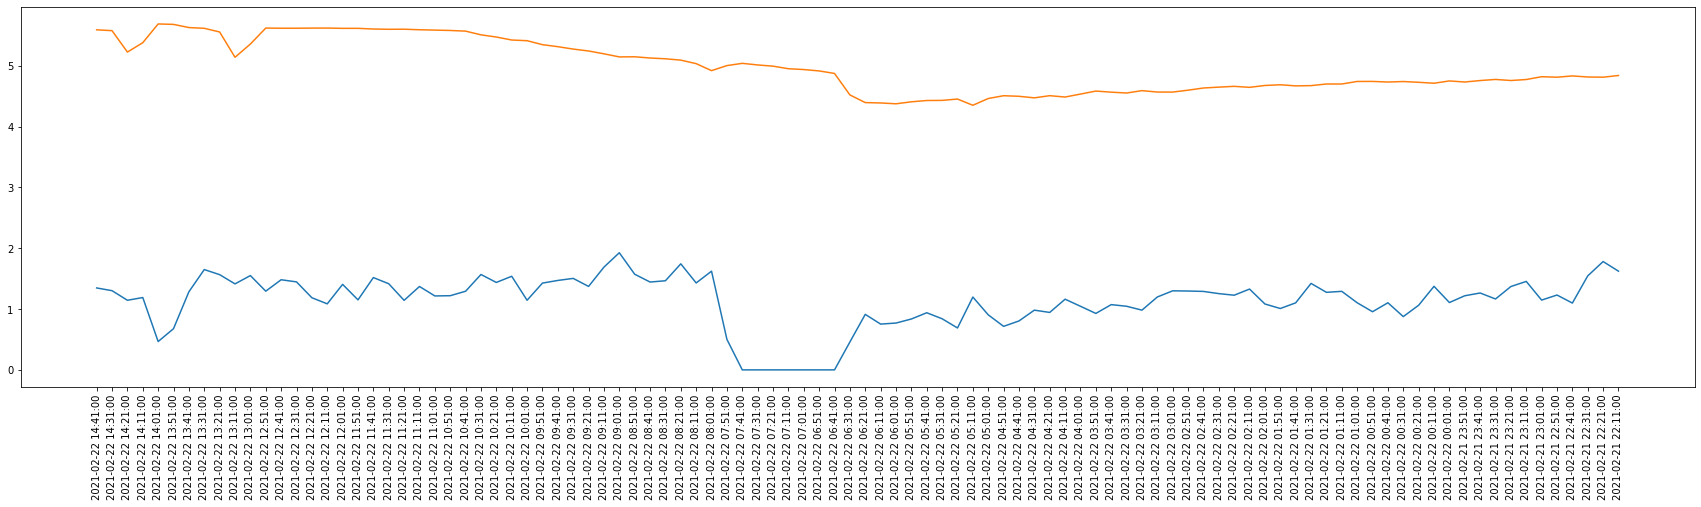

In [6]:
fig = plt.figure(figsize=(30,7))
data_egauge['Uso [kW]'].iloc[0:100].plot()
rows_selected = data_egauge['Tensión DC (Banco de baterías) [V]'].iloc[0:100]
plt.plot(rows_selected.values/10)
plt.xticks(range(data_egauge['Fecha y hora'].iloc[0:100].values.shape[0]), data_egauge['Fecha y hora'].iloc[0:100].values, rotation=90)
# plt.yscale('log')
plt.show()

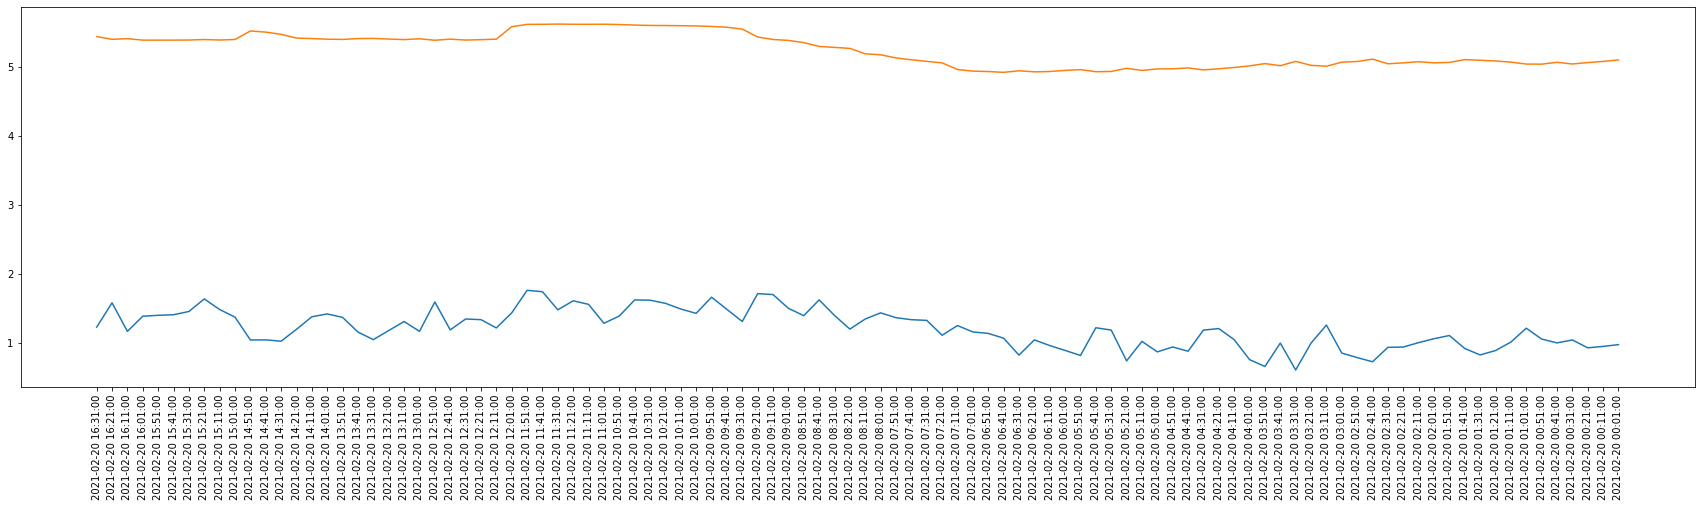

In [8]:
fig = plt.figure(figsize=(30,7))
day_selected = data_egauge[data_egauge['day'] == '2021-02-20']
plt.plot(range(0,100), day_selected['Uso [kW]'].iloc[44:144].values)
rows_selected = day_selected['Tensión DC (Banco de baterías) [V]'].iloc[44:144]
plt.plot(range(0,100),rows_selected.values/10)
plt.xticks(range(day_selected['Fecha y hora'].iloc[0:100].values.shape[0]), day_selected['Fecha y hora'].iloc[44:144].values, rotation=90)
# plt.yscale('log')
plt.show()

In [9]:
data_oct = pd.read_csv('Data_NRG_LG Muelle (07.10-22.02).csv', delimiter='\t', skiprows=170)
data_oct.describe()

,CH1Avg,CH1SD,CH1Max,CH1Min,CH2Avg,CH2SD,CH2Max,CH2Min,CH3Avg,CH3SD,...,CH13Max,CH13Min,CH14Avg,CH14SD,CH14Max,CH14Min,CH15Avg,CH15SD,CH15Max,CH15Min
count,1.775500e+04,17755.0,1.775500e+04,1.775500e+04,17755.000000,17755.000000,17755.000000,17755.000000,1.775500e+04,17755.000000,...,17755.000000,1.775500e+04,1.775500e+04,17755.000000,17755.000000,1.775500e+04,1.775500e+04,17755.0,1.775500e+04,1.775500e+04
mean,4.000000e-01,0.0,4.000000e-01,4.000000e-01,5.102416,0.710724,9.256761,3.217156,4.000000e-01,0.000006,...,0.401459,4.000000e-01,4.000000e-01,0.000006,0.401262,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
std,5.551271e-17,0.0,5.551271e-17,5.551271e-17,4.677716,17.370299,345.032311,2.938339,5.551271e-17,0.000750,...,0.031923,5.551271e-17,5.551271e-17,0.000750,0.029692,5.551271e-17,5.551271e-17,0.0,5.551271e-17,5.551271e-17
min,4.000000e-01,0.0,4.000000e-01,4.000000e-01,0.400000,0.000000,0.400000,0.400000,4.000000e-01,0.000000,...,0.400000,4.000000e-01,4.000000e-01,0.000000,0.400000,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
25%,4.000000e-01,0.0,4.000000e-01,4.000000e-01,0.400000,0.000000,0.400000,0.400000,4.000000e-01,0.000000,...,0.400000,4.000000e-01,4.000000e-01,0.000000,0.400000,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
50%,4.000000e-01,0.0,4.000000e-01,4.000000e-01,5.700000,0.700000,8.000000,2.600000,4.000000e-01,0.000000,...,0.400000,4.000000e-01,4.000000e-01,0.000000,0.400000,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
75%,4.000000e-01,0.0,4.000000e-01,4.000000e-01,9.400000,1.000000,12.100000,5.700000,4.000000e-01,0.000000,...,0.400000,4.000000e-01,4.000000e-01,0.000000,0.400000,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01
max,4.000000e-01,0.0,4.000000e-01,4.000000e-01,111.700000,2313.800000,45974.400000,11.100000,4.000000e-01,0.100000,...,1.100000,4.000000e-01,4.000000e-01,0.100000,1.100000,4.000000e-01,4.000000e-01,0.0,4.000000e-01,4.000000e-01


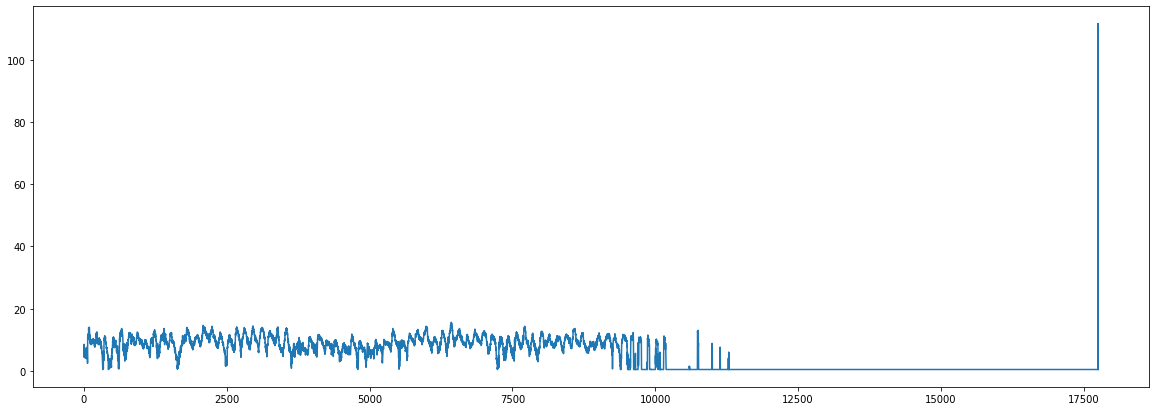

In [11]:
fig = plt.figure(figsize=(20,7))
plt.plot(range(data_oct.shape[0]), data_oct['CH2Avg'].values)
# plt.xticks(range(data_oct.shape[0]), data_oct['Date & Time Stamp'].values, rotation=90)
# plt.yscale('log')

In [12]:
data_oct['day'] = data_oct['Date & Time Stamp'].str[0:10]
# data_oct['day']
data_oct['month'] = data_oct['Date & Time Stamp'].str[3:5]
# data_oct['month']

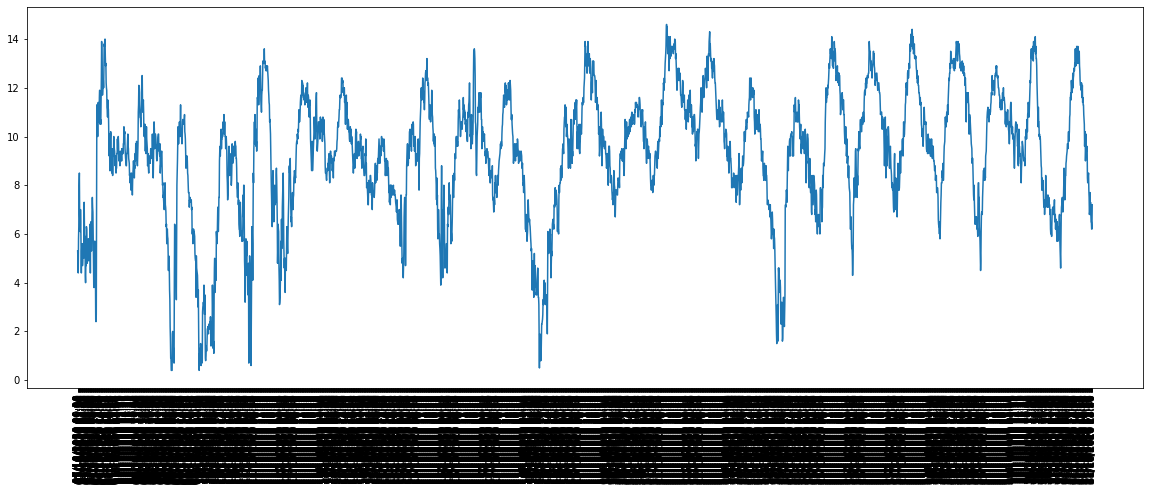

In [15]:
fig = plt.figure(figsize=(20,7))
selected = data_oct[ data_oct['month'] == '10']
plt.plot(range(selected.shape[0]), selected['CH2Avg'].values)
plt.xticks(range(selected.shape[0]), selected['Date & Time Stamp'].values, rotation=90)
# plt.yscale('log')
plt.show()

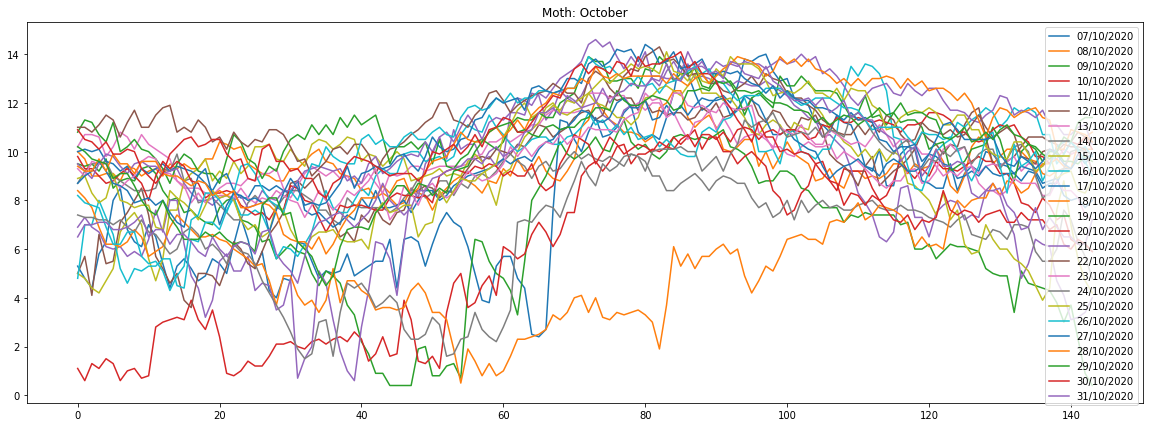

In [16]:
fig = plt.figure(figsize=(20,7))
plt.title('Moth: October')
for sel in selected['day'].unique():
    selected_day = selected[selected['day'] == sel]
    plt.plot(selected_day['CH2Avg'].values, label=sel )
#     print(selected_day.shape)
plt.legend()
plt.show()